In [12]:
import random
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [13]:
# Initial QWERTY keyboard layout
layout = {
    '`': (0, 4), '1': (1, 4), '2': (2, 4), '3': (3, 4), '4': (4, 4), '5': (5, 4),
    '6': (6, 4), '7': (7, 4), '8': (8, 4), '9': (9, 4), '0': (10, 4), '-': (11, 4), '=': (12, 4),
    'q': (1.5, 3), 'w': (2.5, 3), 'e': (3.5, 3), 'r': (4.5, 3), 't': (5.5, 3),
    'y': (6.5, 3), 'u': (7.5, 3), 'i': (8.5, 3), 'o': (9.5, 3), 'p': (10.5, 3),
    'a': (1.75, 2), 's': (2.75, 2), 'd': (3.75, 2), 'f': (4.75, 2), 'g': (5.75, 2),
    'h': (6.75, 2), 'j': (7.75, 2), 'k': (8.75, 2), 'l': (9.75, 2), ';': (10.75, 2),
    'z': (2.25, 1), 'x': (3.25, 1), 'c': (4.25, 1), 'v': (5.25, 1), 'b': (6.25, 1),
    'n': (7.25, 1), 'm': (8.25, 1), ',': (9.25, 1), '.': (10.25, 1), '/': (11.25, 1),
    ' ': (5, 0)  # Space
}

In [14]:
# Function to calculate travel distance between two keys
def travel_distance(pos1, pos2):
    return math.sqrt((pos2[0] - pos1[0]) ** 2 + (pos2[1] - pos1[1]) ** 2)

# Calculate the total distance for a given text with a specific layout
def calculate_total_distance(text, layout):
    total_distance = 0
    for i in range(len(text) - 1):
        char1, char2 = text[i], text[i + 1]
        if char1 in layout and char2 in layout:
            total_distance += travel_distance(layout[char1], layout[char2])
    return total_distance


In [15]:
# Swap two random keys to generate a neighbor layout
def swap_keys(layout):
    new_layout = layout.copy()
    keys_list = list(new_layout.keys()) 
    key1, key2 = random.sample(keys_list, 2)
    new_layout[key1], new_layout[key2] = new_layout[key2], new_layout[key1]
    return new_layout


In [16]:
# Simulated Annealing optimization routine
def simulated_annealing(text, initial_layout, initial_temp=100, cooling_rate=0.99, max_iter=1000):
    current_layout = initial_layout
    current_distance = calculate_total_distance(text, current_layout)
    best_layout = current_layout
    best_distance = current_distance
    temperature = initial_temp

    distances = [current_distance]  # Track distance over time for visualization

    for i in range(max_iter):
        new_layout = swap_keys(current_layout)
        new_distance = calculate_total_distance(text, new_layout)
        delta = new_distance - current_distance

        # Acceptance probability
        if delta < 0 or random.random() < math.exp(-delta / temperature):
            current_layout = new_layout
            current_distance = new_distance

            # Update best solution if improved
            if new_distance < best_distance:
                best_layout = new_layout
                best_distance = new_distance

        distances.append(current_distance)
        temperature *= cooling_rate  # Cool down

        if temperature < 1e-3:  # Stop if temperature is very low
            break

    return best_layout, best_distance, distances

In [17]:
# Plot the keyboard layout with rectangles
def plot_keyboard(layout, title):
    fig, ax = plt.subplots(figsize=(15, 6))
    
    for key, pos in layout.items():
        x, y = pos
        rect = Rectangle((x - 0.4, y - 0.4), 0.8, 0.8, fill=False)
        ax.add_patch(rect)
        ax.text(x, y, key, ha='center', va='center', fontsize=12)

    ax.set_xlim(-1, 15)
    ax.set_ylim(-1, 5)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
    plt.title(title)
    plt.tight_layout()
    plt.show()


In [18]:
# Plot the distance reduction over iterations
def plot_distance_reduction(distances):
    plt.figure(figsize=(8, 4))
    plt.plot(distances)
    plt.xlabel('Iteration')
    plt.ylabel('Total Distance')
    plt.title('Distance Reduction During Optimization')
    plt.show()


In [ ]:
# Sample usage
sample_text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."

In [21]:
ini_distance = calculate_total_distance(sample_text, layout)
print(ini_distance)

1502.7211504834117


Best Distance: 787.3611966520331


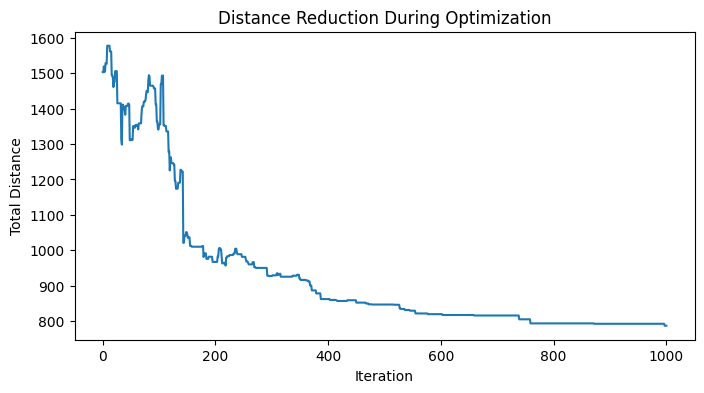

In [22]:
optimized_layout, best_distance, distances = simulated_annealing(sample_text, layout)

print("Best Distance:", best_distance)
plot_keyboard(optimized_layout, "Optimized Keyboard Layout")
plot_distance_reduction(distances)
